In [35]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from scipy.stats import shapiro

In [37]:
# Read CSV
csvpath = "output_data/census.csv"
census_df = pd.read_csv(csvpath,index_col="datapoint")
census_df["Zipcode"] = census_df["Zipcode"].astype("category")
census_df

,Year,Zipcode,Total Population,White Population,Black Population,Employed Count,Unemployed Count,Poverty Count,Poverty Count - White,Poverty Count - Black,Median Income,Median Rent,Median Home Value,County,Adjusted Median Income,Adjusted Median Rent,Adjusted Median Home Value
datapoint,,,,,,,,,,,,,,,,,
0,2012,48009,20153,18622,663,10031.0,489.0,797.0,767.0,0.0,100789.0,993.0,339600.0,Oakland,128472.019282,1265.740459,432875.589083
1,2013,48009,20241,18620,765,10138.0,553.0,704.0,669.0,0.0,98750.0,1070.0,347400.0,Oakland,124055.861168,1344.200217,436425.378933
2,2015,48009,20489,18864,587,10669.0,407.0,827.0,730.0,37.0,108135.0,1121.0,410700.0,Oakland,133518.897062,1384.146517,507108.808651
3,2017,48009,20836,19063,580,10795.0,393.0,914.0,726.0,92.0,114537.0,1223.0,467700.0,Oakland,136748.636321,1460.170794,558398.920937
4,2020,48009,21277,19011,688,10729.0,362.0,1001.0,790.0,114.0,126646.0,1498.0,538500.0,Oakland,143207.147803,1693.889325,608918.158424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,2017,49548,32694,23495,3522,16310.0,963.0,6656.0,4210.0,932.0,45534.0,695.0,82200.0,Kent,54364.200269,829.778170,98140.669876
1246,2012,49548,30155,23134,3109,13743.0,1895.0,6416.0,4296.0,1162.0,39926.0,622.0,89700.0,Kent,50892.198969,792.840449,114337.280155
1247,2015,49548,30234,22081,3032,14715.0,1308.0,6056.0,3203.0,996.0,40895.0,648.0,78800.0,Kent,50494.800900,800.113241,97297.721261


In [38]:
# Create column in DF for ratios of White/Black population and poverty counts AND employed / unemployed
for i in census_df.index:
    census_df.at[i,"% Black Population"] = 100*(census_df.at[i,"Black Population"] / census_df.at[i,"Total Population"])
    census_df.at[i,"% White Population"] = 100*(census_df.at[i,"White Population"] / census_df.at[i,"Total Population"])
    census_df.at[i,"% Unemployed"]       = 100*(census_df.at[i,"Unemployed Count"] / census_df.at[i,"Total Population"])
    census_df.at[i, "% Black Poverty"]   = 100*(census_df.at[i,"Poverty Count - Black"] / census_df.at[i,"Poverty Count"])
    census_df.at[i, "% White Poverty"]   = 100*(census_df.at[i,"Poverty Count - White"] / census_df.at[i,"Poverty Count"])
census_df

,Year,Zipcode,Total Population,White Population,Black Population,Employed Count,Unemployed Count,Poverty Count,Poverty Count - White,Poverty Count - Black,...,Median Home Value,County,Adjusted Median Income,Adjusted Median Rent,Adjusted Median Home Value,% Black Population,% White Population,% Unemployed,% Black Poverty,% White Poverty
datapoint,,,,,,,,,,,,,,,,,,,,,
0,2012,48009,20153,18622,663,10031.0,489.0,797.0,767.0,0.0,...,339600.0,Oakland,128472.019282,1265.740459,432875.589083,3.289833,92.403116,2.426438,0.000000,96.235885
1,2013,48009,20241,18620,765,10138.0,553.0,704.0,669.0,0.0,...,347400.0,Oakland,124055.861168,1344.200217,436425.378933,3.779458,91.991502,2.732078,0.000000,95.028409
2,2015,48009,20489,18864,587,10669.0,407.0,827.0,730.0,37.0,...,410700.0,Oakland,133518.897062,1384.146517,507108.808651,2.864952,92.068915,1.986432,4.474002,88.270859
3,2017,48009,20836,19063,580,10795.0,393.0,914.0,726.0,92.0,...,467700.0,Oakland,136748.636321,1460.170794,558398.920937,2.783644,91.490689,1.886159,10.065646,79.431072
4,2020,48009,21277,19011,688,10729.0,362.0,1001.0,790.0,114.0,...,538500.0,Oakland,143207.147803,1693.889325,608918.158424,3.233539,89.350002,1.701368,11.388611,78.921079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,2017,49548,32694,23495,3522,16310.0,963.0,6656.0,4210.0,932.0,...,82200.0,Kent,54364.200269,829.778170,98140.669876,10.772619,71.863339,2.945495,14.002404,63.251202
1246,2012,49548,30155,23134,3109,13743.0,1895.0,6416.0,4296.0,1162.0,...,89700.0,Kent,50892.198969,792.840449,114337.280155,10.310065,76.716962,6.284198,18.110973,66.957606
1247,2015,49548,30234,22081,3032,14715.0,1308.0,6056.0,3203.0,996.0,...,78800.0,Kent,50494.800900,800.113241,97297.721261,10.028445,73.033671,4.326255,16.446499,52.889696


In [59]:
# Create separate DFs for each county
oakland_data = pd.DataFrame(census_df.loc[census_df["County"] == "Oakland"])
kent_data = pd.DataFrame(census_df.loc[census_df["County"] == "Kent"])
saginaw_data = pd.DataFrame(census_df.loc[census_df["County"] == "Saginaw"])

# Ensure zipcodes are categorical
oakland_data["Zipcode"] = oakland_data["Zipcode"].astype("object")
kent_data["Zipcode"] = kent_data["Zipcode"].astype("object")
saginaw_data["Zipcode"] = saginaw_data["Zipcode"].astype("object")

# Export separate dataframes for use in Map Plots ipynb 
oakland_data.to_csv("output_data/oakland_data.csv",index_label="datapoint")
kent_data.to_csv("output_data/kent_data.csv",index_label="datapoint")
saginaw_data.to_csv("output_data/saginaw_data.csv",index_label="datapoint")

In [60]:
# Create dataframes grouped by zipcode for zipcode analysis
oakland_grouped = oakland_data.groupby("Zipcode").median()
kent_grouped = kent_data.groupby("Zipcode").median()
saginaw_grouped = saginaw_data.groupby("Zipcode").median()

In [61]:
# Create summary statistics table with stats for each county (mean / median of each column)
oakland_data.describe()

,Year,Total Population,White Population,Black Population,Employed Count,Unemployed Count,Poverty Count,Poverty Count - White,Poverty Count - Black,Median Income,Median Rent,Median Home Value,Adjusted Median Income,Adjusted Median Rent,Adjusted Median Home Value,% Black Population,% White Population,% Unemployed,% Black Poverty,% White Poverty
count,660.00000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,2015.50000,18897.180303,14415.646970,2538.968182,9393.575758,729.450000,1737.759091,1122.309091,422.225758,78840.445455,919.559091,218584.090909,95524.991554,1114.224819,264410.699936,12.382511,77.966800,3.902998,14.542136,74.608877
std,2.87446,7836.983282,7129.751787,4041.133585,4106.020362,479.174004,1586.610458,834.464868,830.098825,27204.107298,241.371689,91881.234476,32206.549273,281.945585,107873.734601,19.394900,20.839673,2.017060,18.560917,21.081610
min,2011.00000,2365.000000,2121.000000,0.000000,1257.000000,38.000000,64.000000,48.000000,0.000000,19532.000000,448.000000,45900.000000,24145.619847,582.866644,55968.636331,0.000000,16.506016,0.699134,0.000000,9.718970
25%,2013.00000,14228.750000,9455.500000,275.750000,6766.250000,381.250000,741.750000,530.000000,13.750000,59387.250000,759.750000,159475.000000,73272.914266,922.438506,195173.521236,2.037608,71.504239,2.327478,1.616959,64.108673
50%,2015.50000,18212.500000,13457.500000,885.500000,9150.000000,614.000000,1142.000000,848.000000,75.500000,75778.500000,869.000000,208100.000000,91957.215945,1061.597033,255798.187272,4.336521,85.063713,3.463647,7.551253,80.627641
75%,2018.00000,23661.250000,19758.750000,2198.250000,11999.750000,995.500000,2356.000000,1530.000000,347.500000,96289.000000,1024.000000,270550.000000,117637.781330,1246.332599,325442.845435,11.162644,92.952445,5.103991,18.198396,91.200731
max,2020.00000,44041.000000,35141.000000,17551.000000,22923.000000,2516.000000,9050.000000,4643.000000,5016.000000,155764.000000,1873.000000,544500.000000,183870.152312,2283.861783,619864.437508,76.754632,98.403000,12.987433,84.894614,100.000000


In [62]:
saginaw_data.describe()

,Year,Total Population,White Population,Black Population,Employed Count,Unemployed Count,Poverty Count,Poverty Count - White,Poverty Count - Black,Median Income,Median Rent,Median Home Value,Adjusted Median Income,Adjusted Median Rent,Adjusted Median Home Value,% Black Population,% White Population,% Unemployed,% Black Poverty,% White Poverty
count,250.000000,250.000000,250.000000,250.000000,250.00000,250.000000,250.000000,250.000000,250.00000,250.00000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,2015.500000,9642.356000,7583.468000,1491.752000,4032.19200,459.204000,1702.336000,990.632000,560.74400,49755.36400,546.292000,107357.600000,60347.158973,662.535381,130438.935068,8.212518,87.627465,4.175039,11.741705,81.801924
std,2.878043,9872.110803,6616.978189,4434.346451,3833.83238,681.684409,2970.836473,1326.466533,1805.10773,11470.42618,92.369819,31167.952246,13498.411576,106.538671,37785.474709,17.280321,19.262811,2.008659,19.790301,21.627543
min,2011.000000,723.000000,215.000000,0.000000,289.00000,15.000000,23.000000,18.000000,0.00000,15552.00000,290.000000,38000.000000,20233.799208,369.652299,45369.166123,0.000000,16.475096,0.838212,0.000000,19.444444
25%,2013.000000,2680.500000,2491.000000,7.250000,1145.25000,88.000000,301.250000,245.750000,1.00000,44569.50000,491.250000,92225.000000,54558.167246,596.402959,111281.791935,0.227346,87.444288,2.647716,0.102699,77.022516
50%,2015.500000,6162.000000,6025.000000,52.000000,2819.50000,179.500000,573.000000,478.500000,8.00000,50138.00000,531.000000,109300.000000,61134.892034,646.656019,131785.062301,0.873293,95.692784,3.912995,2.066260,90.560769
75%,2018.000000,12477.750000,10951.750000,837.750000,5786.50000,523.250000,1275.000000,902.000000,270.50000,55472.25000,601.000000,123000.000000,68037.358633,731.201273,150129.919697,7.545506,97.424763,5.289796,15.133517,95.797359
max,2020.000000,39371.000000,25010.000000,23912.000000,13057.00000,3619.000000,15059.000000,5644.000000,10828.00000,81436.00000,917.000000,214700.000000,93274.042380,1094.829614,242775.726302,77.088452,99.413834,10.135135,77.398160,100.000000


In [63]:
kent_data.describe()

,Year,Total Population,White Population,Black Population,Employed Count,Unemployed Count,Poverty Count,Poverty Count - White,Poverty Count - Black,Median Income,Median Rent,Median Home Value,Adjusted Median Income,Adjusted Median Rent,Adjusted Median Home Value,% Black Population,% White Population,% Unemployed,% Black Poverty,% White Poverty
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,2015.500000,21661.090323,17698.564516,1952.183871,10680.751613,823.848387,2988.593548,1886.435484,644.500000,60207.225806,686.274194,158057.419355,72939.111315,831.865152,191346.816151,6.406064,85.943068,3.755119,12.525496,75.514746
std,2.876925,11323.787238,8378.134441,3191.883259,5619.295515,637.019882,2942.239965,1491.303568,1165.969066,18139.863853,135.532483,53178.953484,21310.641683,154.110764,61882.408532,8.679281,12.761952,1.694281,14.509812,18.518151
min,2011.000000,1601.000000,1529.000000,0.000000,795.000000,42.000000,110.000000,106.000000,0.000000,31946.000000,436.000000,78800.000000,40338.569135,500.929887,97297.721261,0.000000,39.319264,0.506977,0.000000,26.071492
25%,2013.000000,11053.250000,10497.500000,100.000000,5711.250000,340.000000,983.000000,787.000000,9.250000,47663.000000,606.000000,120175.000000,57487.808216,743.147635,146457.538589,0.620832,80.003893,2.492008,0.888343,61.878346
50%,2015.500000,20342.000000,18353.000000,414.500000,10352.500000,689.000000,1903.000000,1584.000000,84.500000,56814.000000,659.500000,148850.000000,68915.433282,814.972213,179928.625713,2.282831,91.314538,3.408494,5.607735,81.287727
75%,2018.000000,31694.250000,24666.500000,2697.750000,15553.250000,1059.500000,4083.500000,2281.750000,820.000000,69942.250000,756.000000,182775.000000,83000.787215,904.131511,224224.339331,8.515436,95.496922,4.898263,20.988664,91.652868
max,2020.000000,41613.000000,35837.000000,15849.000000,21378.000000,3139.000000,12983.000000,6971.000000,6695.000000,143221.000000,1271.000000,386400.000000,161949.614796,1469.722197,436928.461310,41.804706,98.631894,8.853238,65.260382,100.000000


# Income in Each County, by Zipcode **Jonathan**

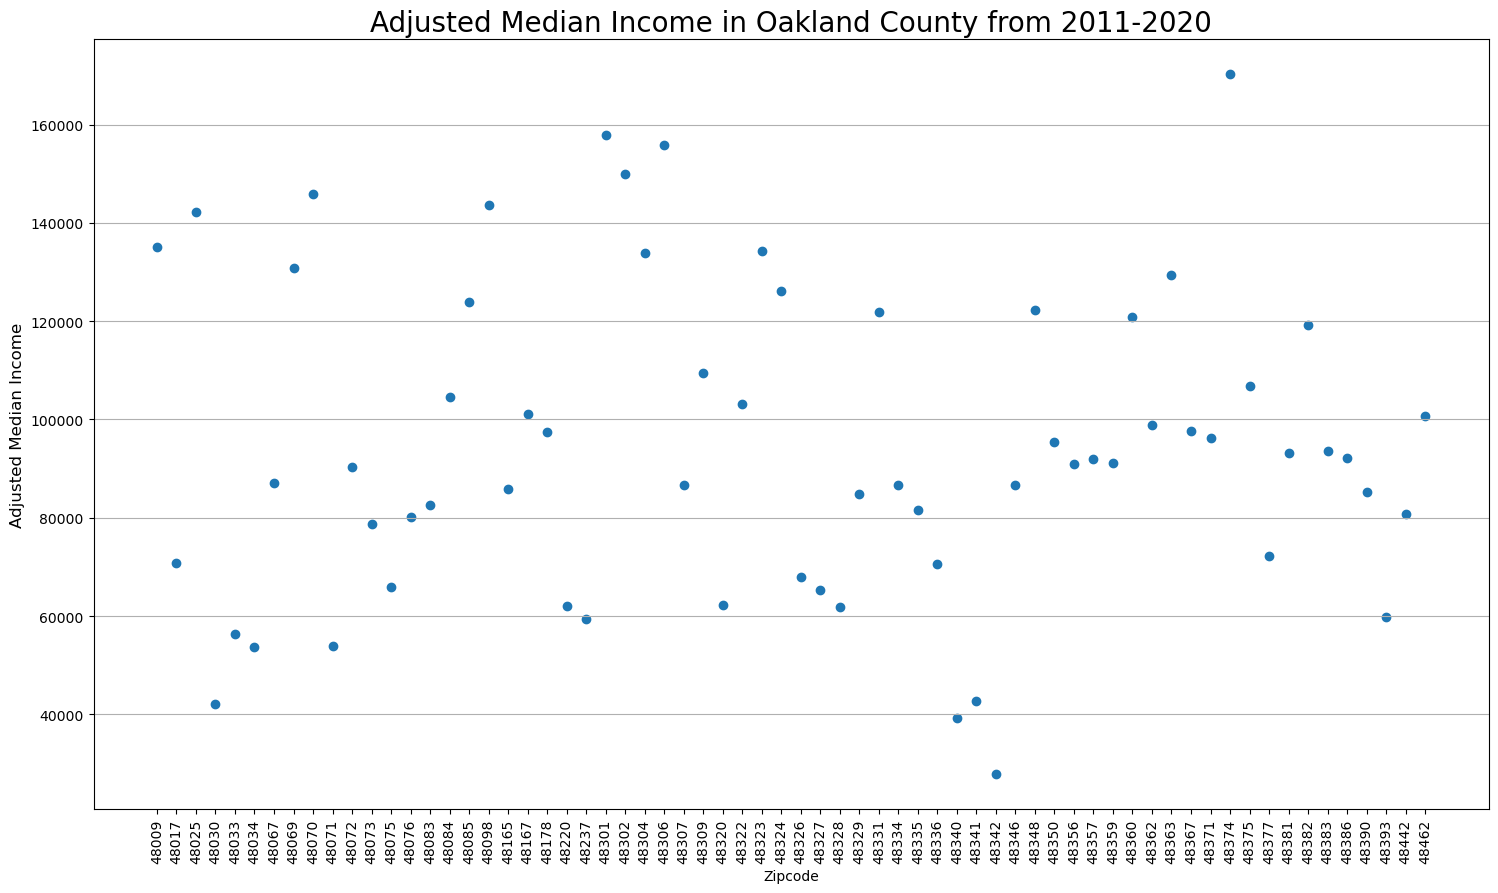

In [65]:
# Create scatter plot(s) for Income in each county
#Oakland
fig = plt.figure(figsize=(18, 10));
xaxis = np.arange(0, len(oakland_grouped.index));
label = oakland_grouped.index.tolist();
plt.scatter(xaxis, oakland_grouped['Adjusted Median Income'],
                    label='');
plt.xticks(ticks=xaxis, labels=label, rotation=90);

plt.xlabel('Zipcode', size = 10);
plt.ylabel('Adjusted Median Income', size = 12);
plt.title('Adjusted Median Income in Oakland County from 2011-2020', size = 20);

plt.grid(axis='y');

plt.show()

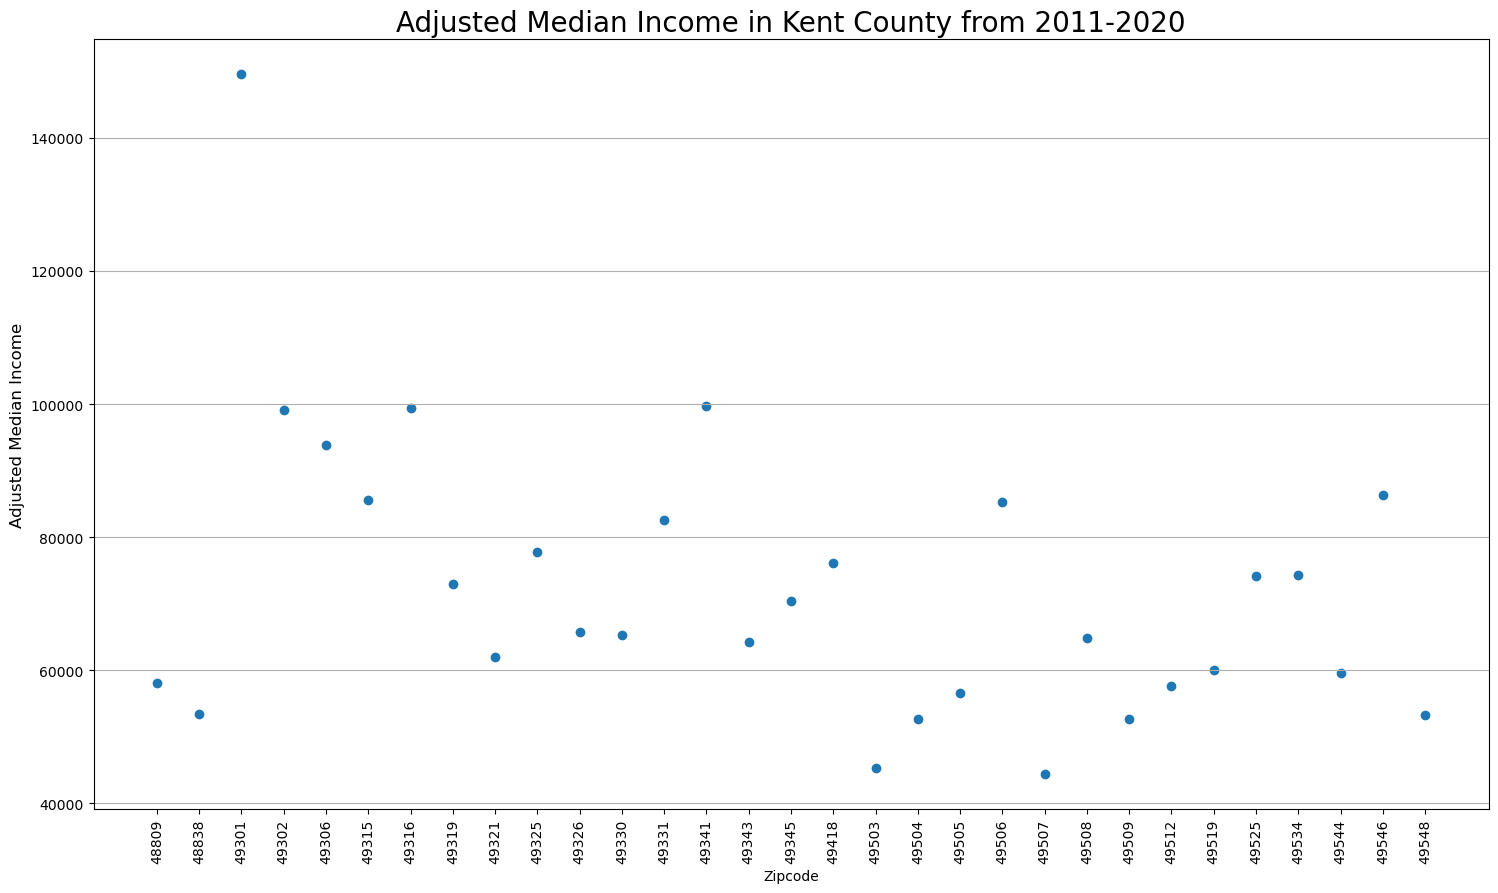

In [66]:
#Kent
fig = plt.figure(figsize=(18, 10));
xaxis = np.arange(0, len(kent_grouped.index));
label = kent_grouped.index.tolist();
plt.scatter(xaxis, kent_grouped['Adjusted Median Income'],
                    label='');
plt.xticks(ticks=xaxis, labels=label, rotation=90);

plt.xlabel('Zipcode', size = 10);
plt.ylabel('Adjusted Median Income', size = 12);
plt.title('Adjusted Median Income in Kent County from 2011-2020', size = 20);

plt.grid(axis='y');

plt.show()

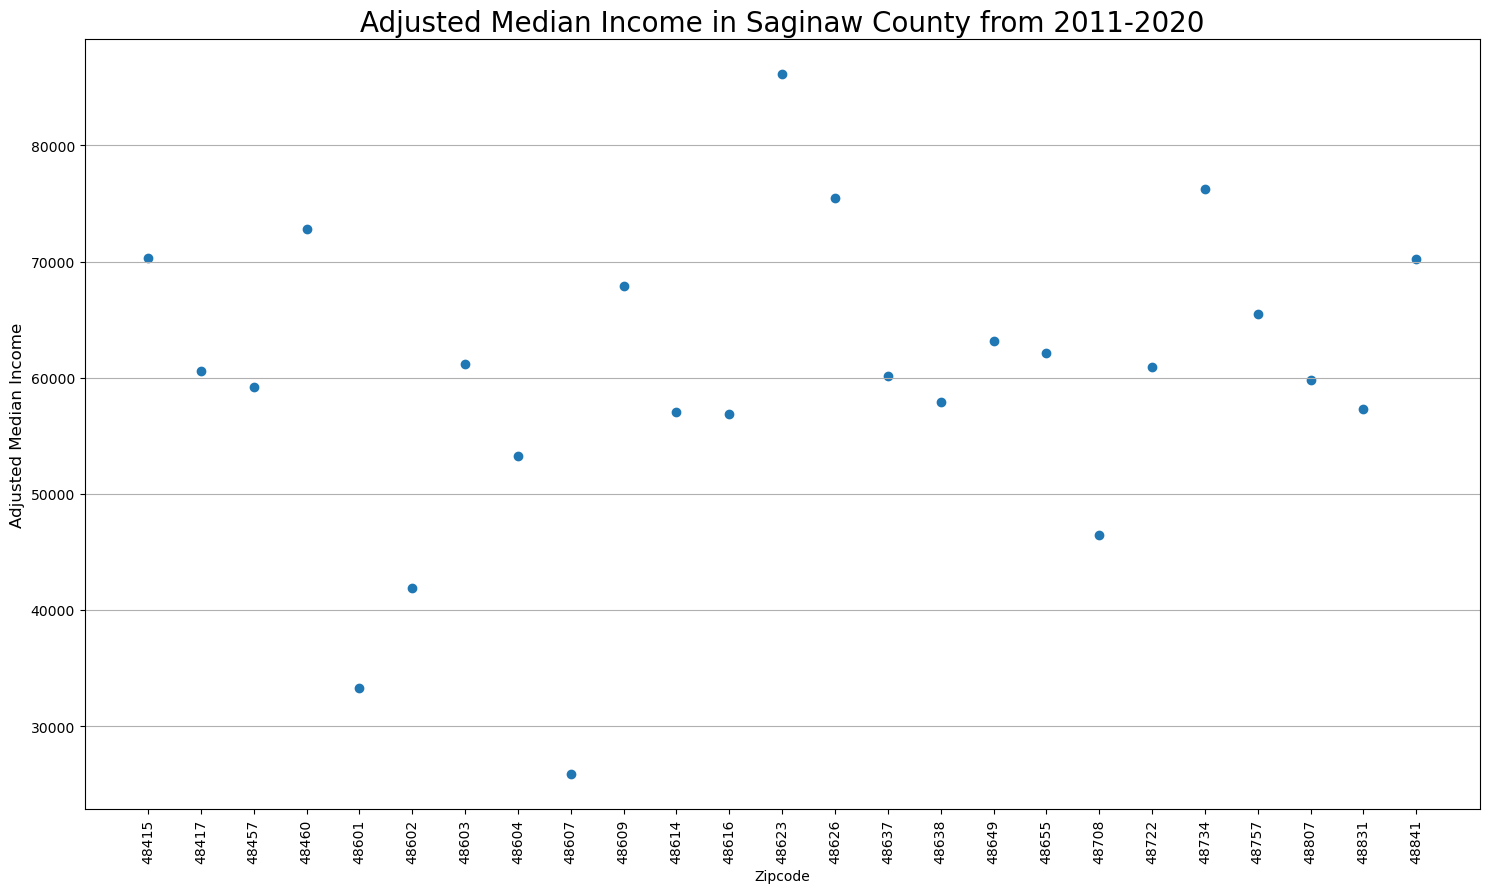

In [68]:
#Saginaw
fig = plt.figure(figsize=(18, 10));
xaxis = np.arange(0, len(saginaw_grouped.index));
label = saginaw_grouped.index.tolist();
plt.scatter(xaxis, saginaw_grouped['Adjusted Median Income'],
                    label='');
plt.xticks(ticks=xaxis, labels=label, rotation=90);

plt.xlabel('Zipcode', size = 10);
plt.ylabel('Adjusted Median Income', size = 12);
plt.title('Adjusted Median Income in Saginaw County from 2011-2020', size = 20);

plt.grid(axis='y');

plt.show()

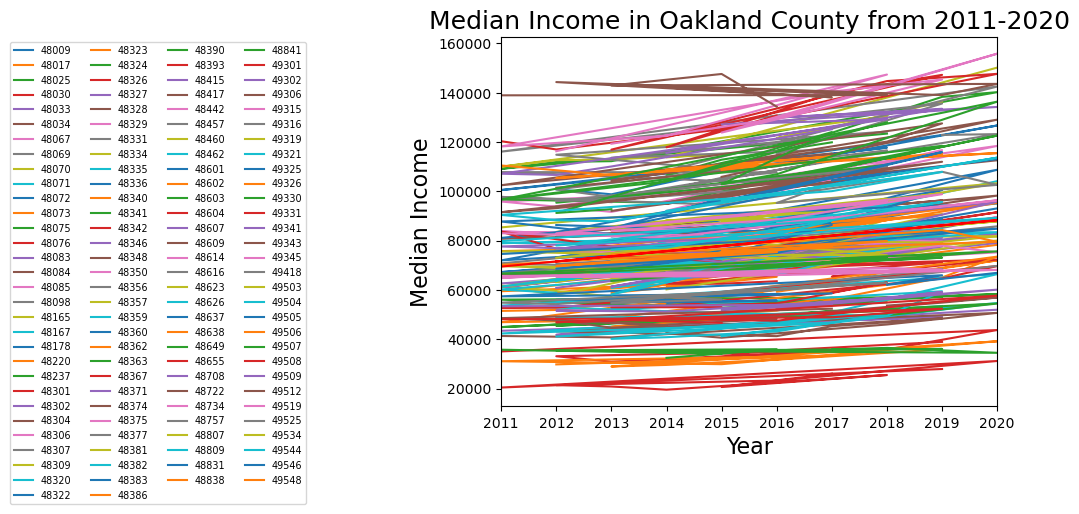

In [69]:
# Calculate the linear regression and correlation for each county's plot
#Oakland
oakland_df = census_df.loc[census_df['County'] == 'Oakland'];
oakland_data = oakland_df.sort_values('Year', ascending=True);
oakland_df.set_index('Year', inplace=True);
oakland_df.groupby('Zipcode')['Median Income'].plot();

plt.xlabel('Year', size = 16);
plt.xlim(2011, 2020);
plt.ylabel('Median Income', size = 16);
plt.title('Median Income in Oakland County from 2011-2020', size = 18);

plt.legend(loc='upper left', fontsize='x-small', bbox_to_anchor=(-1.0,1.0), ncol= 4);


# Add the linear regression line to the graph, if it makes sense (|r| > ?)
(slope, intercept, rvalue, pvalue, stderr) = \
    linregress(oakland_df.index, oakland_df['Median Income']);
regress_values = oakland_df.index * slope + intercept;
line_eq = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept,
        2));
plt.plot(oakland_df.index, regress_values, 'r-');
plt.annotate(line_eq, (2020, 180000), fontsize=18, color='black');

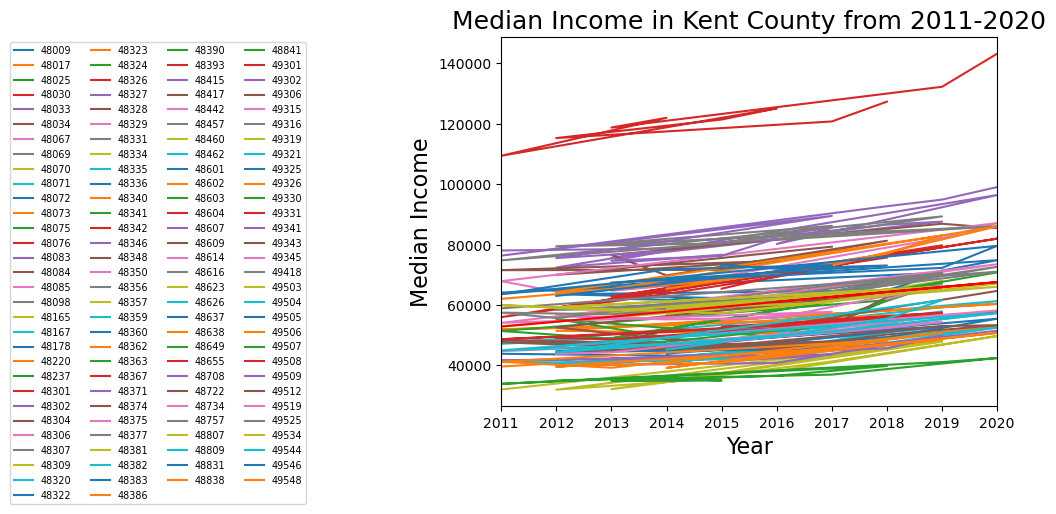

In [70]:
#Kent
kent_df = census_df.loc[census_df['County'] == 'Kent'];
kent_data = kent_df.sort_values('Year', ascending=True);
kent_df.set_index('Year', inplace=True);
kent_df.groupby('Zipcode')['Median Income'].plot();

plt.xlabel('Year', size = 16);
plt.xlim(2011, 2020);
plt.ylabel('Median Income', size = 16);
plt.title('Median Income in Kent County from 2011-2020', size = 18);

plt.legend(loc='upper left', fontsize='x-small', bbox_to_anchor=(-1.0,1.0), ncol= 4);


# Add the linear regression line to the graph, if it makes sense (|r| > ?)
(slope, intercept, rvalue, pvalue, stderr) = \
    linregress(kent_df.index, kent_df['Median Income']);
regress_values = kent_df.index * slope + intercept;
line_eq = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept,
        2));
plt.plot(kent_df.index, regress_values, 'r-');
plt.annotate(line_eq, (2020, 180000), fontsize=18, color='black');

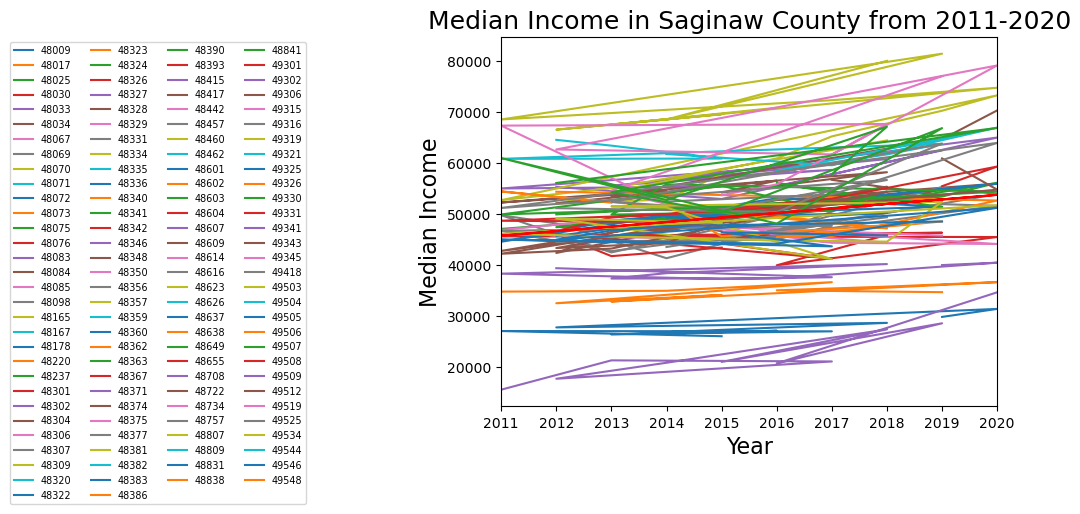

In [71]:
#Saginaw
saginaw_df = census_df.loc[census_df['County'] == 'Saginaw'];
saginaw_data = saginaw_df.sort_values('Year', ascending=True);
saginaw_df.set_index('Year', inplace=True);
saginaw_df.groupby('Zipcode')['Median Income'].plot();

plt.xlabel('Year', size = 16);
plt.xlim(2011, 2020);
plt.ylabel('Median Income', size = 16);
plt.title('Median Income in Saginaw County from 2011-2020', size = 18);

plt.legend(loc='upper left', fontsize='x-small', bbox_to_anchor=(-1.0,1.0), ncol= 4);


# Add the linear regression line to the graph, if it makes sense (|r| > ?)
(slope, intercept, rvalue, pvalue, stderr) = \
    linregress(saginaw_df.index, saginaw_df['Median Income']);
regress_values = saginaw_df.index * slope + intercept;
line_eq = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept,
        2));
plt.plot(saginaw_df.index, regress_values, 'r-');
plt.annotate(line_eq, (2020, 120000), fontsize=18, color='black');


,Year,Oakland Average Income,Kent Average Income,Adjusted Median Income
0,2011,95520.287311,71898.371614,62144.721150
1,2012,92294.531151,70742.774149,60474.096431
2,2013,90977.286570,70398.930345,59534.451743
3,2014,90980.358135,70177.030952,59251.017142
4,2015,93100.007812,70451.747291,58761.649928
5,2016,94421.033078,71709.200703,58696.540350
6,2017,96816.063887,73025.870870,58993.861008
7,2018,98484.404971,74834.896517,60524.867849
8,2019,100628.510768,77149.997333,62196.522276
9,2020,102027.431861,79002.293378,62893.861855


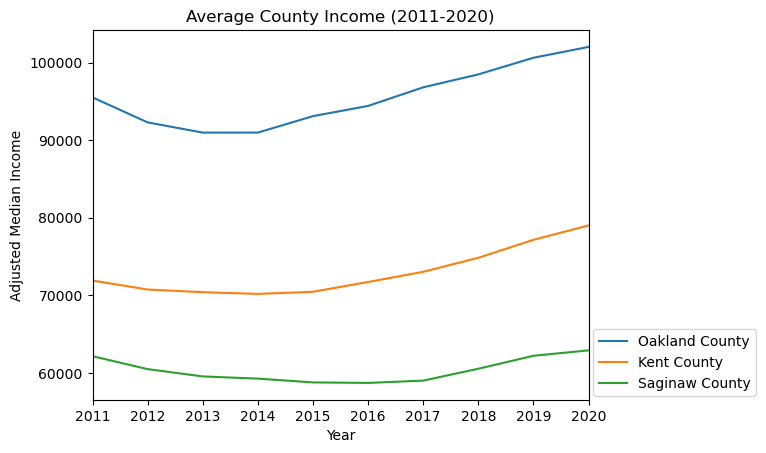

In [72]:
#Export Final Graph 
oakland_county_mean_income = oakland_df.groupby('Year')['Adjusted Median Income'].mean()
kent_county_mean_income = kent_df.groupby('Year')['Adjusted Median Income'].mean()
saginaw_county_mean_income = saginaw_df.groupby('Year')['Adjusted Median Income'].mean()

plt.plot(oakland_county_mean_income, label="Oakland County")
plt.plot(kent_county_mean_income, label="Kent County")
plt.plot(saginaw_county_mean_income, label="Saginaw County")

plt.legend(loc=(1.01,0.01))
plt.xlabel('Year')
plt.ylabel('Adjusted Median Income')
plt.title('Average County Income (2011-2020)')
plt.xlim(2011,2020)

oakland_county_mean_income = pd.DataFrame(oakland_county_mean_income).reset_index()
kent_county_mean_income = pd.DataFrame(kent_county_mean_income).reset_index()
saginaw_county_mean_income = pd.DataFrame(saginaw_county_mean_income).reset_index()

county_income = pd.merge(oakland_county_mean_income, kent_county_mean_income, how='outer', on='Year')
county_income = pd.merge(county_income, saginaw_county_mean_income, how='outer', on='Year')
county_income.rename(columns={'Adjusted Median Income_x': 'Oakland Average Income', 'Adjusted Median Income_y':'Kent Average Income'}) 

# Home Values in Each County, by Zipcode **Tamica**

In [ ]:
# Create scatter plot(s) for Home Values in each county


In [ ]:
# Calculate the linear regression and correlation for each county's plot


In [ ]:
# Add the linear regression line to the graph, if it makes sense (|r| > ?)


In [ ]:
# Export final graph


# Rent Prices in Each County, by Zipcode **Stephanie**

In [ ]:
# Create scatter plot(s) for Rent Prices in each county


In [ ]:
# Calculate the linear regression and correlation for each county's plot


In [ ]:
# Add the linear regression line to the graph, if it makes sense (|r| > ?)


In [ ]:
# Export final graph


# Demographic Composition in Each County, by Zipcode **Rhi**

In [ ]:
# Create scatter plot(s) for total population in each county 
# also need to do graphs for demographic composition, employment rate, poverty rate
# Need to create more filters by year and by zip code within counties


In [ ]:
# Calculate the linear regression and correlation for each county's plot


In [ ]:
# Add the linear regression line to the graph, if it makes sense (|r| > ?)


In [ ]:
# Export final graph


# Combination Visualizations

# GIF Maps

In [ ]:
# Relocate needed module and import it (install as well)

In [ ]:
# Determine what specific visualizations to convert to map GIFs

In [ ]:
# Create maps by county, showing individual points per zipcode (heat map)

In [ ]:
# Export maps?